Here is previous post with my multivariable gradient descent implementation: https://nbviewer.jupyter.org/github/lion137/blog/blob/master/gradient_descent_multi.ipynb, but it has a bug and also lacked input features, so I rebuilt it and also updated the old version. This is a code:

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
# helping functions
def split_input_and_to_float(xs):
    def helper(ys):
        l = list(map(int, ys))
        l = list(map(float, ys))
        return l
    l1 = list(map(helper, xs))
    return l1

def split(x):
    """simple split string"""
    return x.split(',')

def Sum(X, y, theta, ind):
    "compute sum under the sigma in g d algorithm"
    i = 0
    s = 0
    while i < len(X):
        s += (theta * X[i,:].transpose() - y[0, i]) * X[i, ind]
        i += 1
    return float(s)

def J_m(A, y, theta):
    """computes cost function """
    n = len(A)
    return (1 / (2 * n)) * float(sum([x * x for x in A * theta.transpose() - y.transpose()]))

def scaling(X):
    """mean normalzation"""
    l = []
    for k in range(X.shape[1]):
        x = X[:,k]
        def f(e):
            tmp0 = sum(x) / len(x)
            tmp1 = max(x) - min(x)
            return (e - tmp0) / tmp1
        m =  list(map(float, (list(map(f, x[:, 0])))))
        l.append(m)
    return np.matrix(l).transpose()

time in secs:  0.02801966667175293
[[17 31]] 0.0 0.625 8


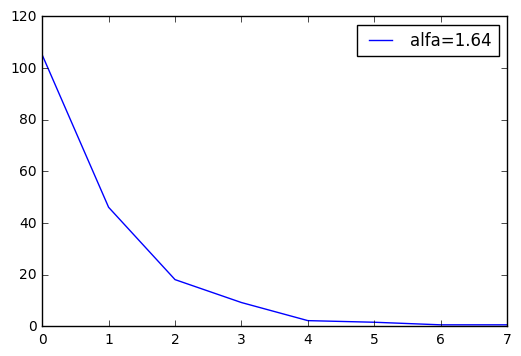

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 2.51 ms
[[ 17.5]
 [ 33. ]]


In [3]:
# gradient descent
l_iin = [] # debbuging data arrays
l_cost = []
f = open('data1.txt', 'r') # reading from file added
f1 = list(map(str.rstrip, f.readlines()))
f2 = f1[0].split(',')
f3 = list(map(split, f1))
f4 = split_input_and_to_float(f3)
X = np.matrix([0] * len(f4[0]))
for elem in f4:
       X = np.vstack([X, elem])
X = X[1: , :]
y = X[:,X.shape[1] - 1].transpose()
X = X[:,:X.shape[1] - 1]
X = scaling(X)
X = np.c_[[1] * len(X), X]
theta = np.matrix([0] * X.shape[1])
tmp = np.matrix([0] * X.shape[1])
m = X.shape[0]
cnt = 0
alfa = 1.64
precision = 0.001
delta = precision + 1
t_start = time.time()
while delta > precision:
    beg = J_m(X, y, theta)
    for i in range(X.shape[1]):
        tmp[0,i] = theta[0,i] - (alfa / m) * (Sum(X, y, theta, i))
    theta = tmp
    end = J_m(X, y, theta)
    delta = abs(end - beg)
    l_iin.append(cnt)
    l_cost.append(J_m(X, y, theta))
    cnt += 1
t_end = time.time()
print("time in secs: ", t_end - t_start)
print(theta, delta, end, cnt)


plt.plot(l_iin, l_cost, color="blue", linewidth=1, label="alfa=1.64")
plt.legend(loc="upper right")
plt.show()  

%time theta = ((X.transpose() * X).getI()) * X.transpose() * y.transpose()
print(theta)

There  is also added analytically method for minimizing cost function:

In [15]:
theta = ((X.transpose() * X).getI()) * X.transpose() * y.transpose()

This is Octave's:    
pinv(X' *  X) * X' y    
Doesnt work for singular matrixes though, but is great for testing purposes and after checking lots of datasets, algorithm seems to be OK. There are still, differences beetwen both methods, so I'm going, obviously, to work this out and publish results here!